In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

start_date = '2011-01-01'
end_date = '2021-09-01'
ticker = 'BABA'
output_file = ticker.lower() + '_data_' + start_date.replace('-', '') + '_' + end_date.replace('-', '') + '.pkl'

def load_financial_data(start_date, end_date, output_file, ticker):
    try:
        df = pd.read_pickle(output_file)
    except FileNotFoundError:
        df = data.DataReader(ticker, 'yahoo', start_date, end_date)
        df.to_pickle(output_file)

    return df

def naive_momentum_trading(financial_data, nb_conseq_days):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    cons_day = 0
    prior_price = 0
    init = True
    for k in range(len(financial_data['Adj Close'])):
        price = financial_data['Adj Close'][k]
        if init:
            prior_price = price
            init = False
        elif price > prior_price:
            if cons_day < 0:
                cons_day = 0
            cons_day += 1
        elif price < prior_price:
            if cons_day > 0:
                cons_day = 0
            cons_day -= 1
        if cons_day == nb_conseq_days:
            signals['orders'][k] = 1
        elif cons_day == -nb_conseq_days:
            signals['orders'][k] = -1

    return signals


In [2]:
data = load_financial_data(start_date, end_date, output_file, ticker)
# print(data)

In [3]:
ts = naive_momentum_trading(data, 5)
# print(ts)

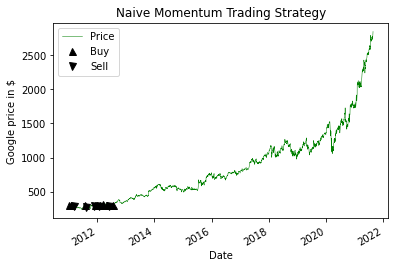

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
data["Adj Close"].plot(ax=ax1, color='g', lw=.5)

ax1.plot(ts.loc[ts.orders == 1.0].index,
         data["Adj Close"][ts.orders == 1],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders == -1.0].index,
         data["Adj Close"][ts.orders == -1],
         'v', markersize=7, color='k')

plt.legend(["Price", "Buy", "Sell"])
plt.title("Naive Momentum Trading Strategy")

plt.show()
